In [8]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans

# Dataset 🔥🔥

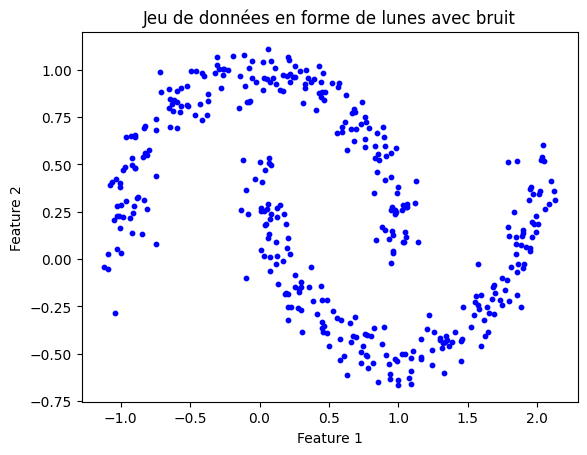

In [6]:
# Création d'un jeu de données en forme de "lune" avec du bruit
X, _ = make_moons(n_samples=400, noise=0.08, random_state=42)
# symbole _ est une convention en Python qui signifie “je ne vais pas utiliser cette variable”.

# Visualisation des données
plt.scatter(X[:, 0], X[:, 1], s=10, color='blue')
plt.title("Jeu de données en forme de lunes avec bruit")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Let's try K-Means 🙈🙈

As you can see we definitely have a weirdly-shaped cluster. Let's try to apply K-Means to see how it tackles this issue.

In [9]:
# Instanciation de KMeans avec 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Ajustement du modèle sur les données
kmeans.fit(X)

# Récupération des labels prédits pour chaque point
labels = kmeans.predict(X)

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Ajout des points de chaque cluster
for cluster_id in np.unique(labels):  # Unique permet de boucler sur les clusters présents
    cluster_points = X[labels == cluster_id]
    fig.add_trace(go.Scatter(
        x=cluster_points[:, 0], 
        y=cluster_points[:, 1],
        mode="markers",
        name=f"Cluster {cluster_id}"
    ))

# Ajout des centres des clusters
centers = kmeans.cluster_centers_
fig.add_trace(go.Scatter(
    x=centers[:, 0], 
    y=centers[:, 1],
    mode="markers",
    marker=dict(size=10, color='red', symbol='x'),
    name="Centroids"
))

# Configuration de la figure
fig.update_layout(
    title="KMeans Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

As you can see, K-Means does a pretty bad job 😥 at creating nice clusters from this moon-shaped dataset. So we need to find something else. Let's use DBSCAN now.

# Apply DBSCAN 🚀🚀

Let's check out how DBSCAN performs on this moon-shaped dataset.

In [10]:
# Instanciation de DBSCAN
db = DBSCAN(eps=0.2, min_samples=5, metric="euclidean", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

🎉🎉 Yayy !! DBSCAN is doing a much better job at creating clusters!

# Select eps & min_sample

In the above code, we specified eps=0.2 and min_sample=3. But why did do that? Well let's play around to see the influence of these two parameters.

## Play with eps 🤙

Let's first play around with eps. As a reminder eps is the maximum distance which determines whether an observation belongs to a core sample or not. Let's start with high eps.

In [11]:
# Instanciation de DBSCAN
db = DBSCAN(eps=1, min_samples=5, metric="euclidean", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

As you can see, DBSCAN wasn't able to find two clusters because eps was extremely high. Therefore, we obtain a very low density cluster.

Let's now try with a very low eps:

In [12]:
# Instanciation de DBSCAN
db = DBSCAN(eps=0.001, min_samples=5, metric="euclidean", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

This time all data points are considered outliers! Which is definitely not what we want either.

## Play with min_sample 😎
    
Let's now play with min_sample parameter. As a reminder min_sample determines the minimum number of observations to create a core-sample. Let's first have a high min_sample.

In [14]:
# Instanciation de DBSCAN
db = DBSCAN(eps=0.2, min_samples=25, metric="euclidean", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

We only have a lot of clusters! Let's reduce our min_sample.

In [15]:
# Instanciation de DBSCAN
db = DBSCAN(eps=0.2, min_samples=2, metric="euclidean", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

This time we have no outliers so every data points belong to one cluster.

## Distances 🏃‍♀️🏃‍♀️

You can also play around in the metric parameter. With this dataset, you won't see much of a difference but you can still try different values when dealing with other types of datasets.

In [16]:
# Instanciation de DBSCAN
db = DBSCAN(eps=0.2, min_samples=10, metric="manhattan", algorithm="brute")

# Ajustement du modèle sur les données
db.fit(X)

# Récupération des labels (clusters détectés)
labels = db.labels_

# Création d'une figure interactive avec Plotly
fig = go.Figure()

# Boucle pour visualiser chaque cluster
for cluster_id in np.unique(labels):
    # Gestion des points bruités (label = -1)
    if cluster_id == -1:
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            marker=dict(color="grey", size=5, symbol="circle"),
            name="Noise"
        ))
    else:
        # Points appartenant à un cluster
        cluster_points = X[labels == cluster_id]
        fig.add_trace(go.Scatter(
            x=cluster_points[:, 0], 
            y=cluster_points[:, 1],
            mode="markers",
            name=f"Cluster {cluster_id}"
        ))

# Configuration de la figure
fig.update_layout(
    title="DBSCAN Clustering",
    xaxis_title="Feature 1",
    yaxis_title="Feature 2",
    legend_title="Clusters",
)

fig.show()

## Algorithm 🎰🎰

As a final note, you might see that each time we used algorithm=brute. This refers to the way DBSCAN is assigning observations to a given cluster. brute simply means that each data points are evaluated one-by-one.

You can also use ballTree or KDtree. It is a little beyond the scope of the course but you can find more information here 👉👉 Tree Algorithms explained ball tree algorithm VS KD Tree VS Brute Force

What we advise is to use auto where sklearn will try to figure which approach is best.